In [24]:
import pickle
import numpy as np
import pandas as pd
from plotting import *

def load_grid(file):
    # grid_results: [gold_agreement, expected_agreement, sampled_agreement, no_possible_coaltions, entropy]
    grid_results = None
    with open('model_runs/ratio/{}_issues.pickle'.format(file), 'rb') as handle:
        grid_results = pickle.load(handle)
        
    E = file + 1

    avg_gold_regrets = [None] * E
    avg_expected_regrets = [None] * E
    avg_possible_coalitions = [None] * E
    avg_entropies = [None] * E
    normalized_expected_regrets = [None] * E
    expected_regrets_std = [None] * E
    sampled_regrets_std = [None] * E

    labels = [n for n in range(E)]

    no_results = len(grid_results)
    print("Results in grid: ", no_results)
    print("Values per setting: ", no_results/E)

    for e in range(E):          
        gold_regrets = [None] * int(no_results / E)
        expected_regrets = [None] * int(no_results / E)
        no_possible_coalitions = [None] * int(no_results / E)
        entropies = [None] * int(no_results / E)

        for i, index in enumerate(range(e, len(grid_results), E)):
            gold_regrets[i], expected_regrets[i], no_possible_coalitions[i], entropies[i] = grid_results[index]

        avg_gold_regrets[e] = np.sum(gold_regrets) / len(gold_regrets)

        avg_expected_regrets[e] = np.sum(expected_regrets) / len(expected_regrets)

        avg_possible_coalitions[e] = np.sum(no_possible_coalitions) / len(no_possible_coalitions)

        avg_entropies[e] = np.sum(entropies) / len(entropies)

        normalized_expected_regrets[e] = avg_expected_regrets[e] / avg_gold_regrets[e]

        expected_regrets_std[e] = np.std(expected_regrets)
        
    return [avg_gold_regrets, avg_expected_regrets, avg_possible_coalitions, 
            avg_entropies, normalized_expected_regrets, expected_regrets_std, [n for n in range(E)]]

In [25]:
# grid[0] = avg_gold_regrets
# grid[1] = avg_expected_regrets
# grid[2] = avg_possible_coalitions
# grid[3] = avg_entropies
# grid[4] = normalized_expected_regrets
# grid[5] = expected_regrets_std
# grid[6] = labels

# Entropy

Results in grid:  3000
Values per setting:  1000.0


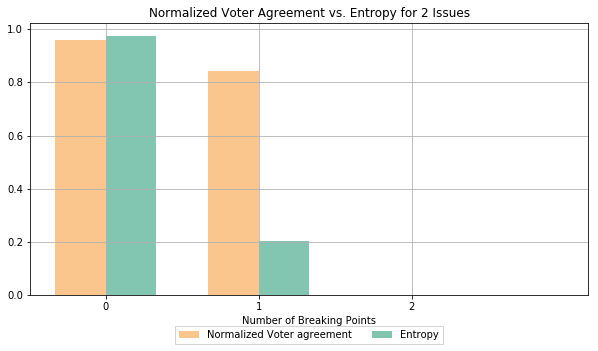

Results in grid:  5000
Values per setting:  1000.0


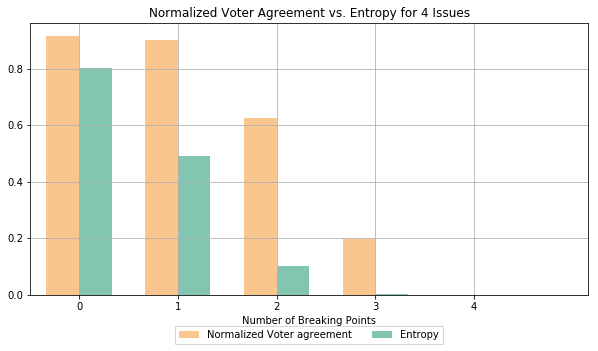

Results in grid:  7000
Values per setting:  1000.0


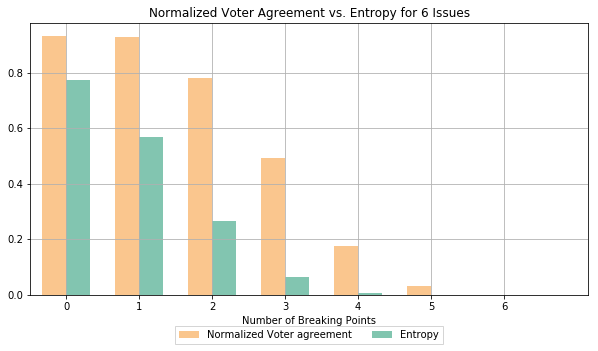

Results in grid:  9000
Values per setting:  1000.0


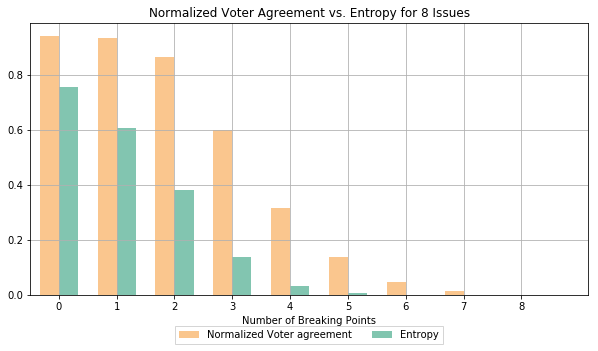

Results in grid:  11000
Values per setting:  1000.0


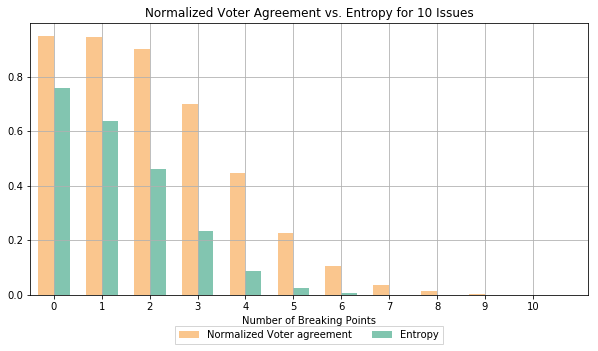

Results in grid:  13000
Values per setting:  1000.0


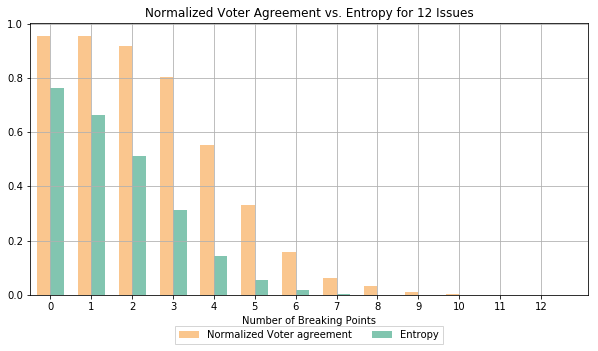

Results in grid:  15000
Values per setting:  1000.0


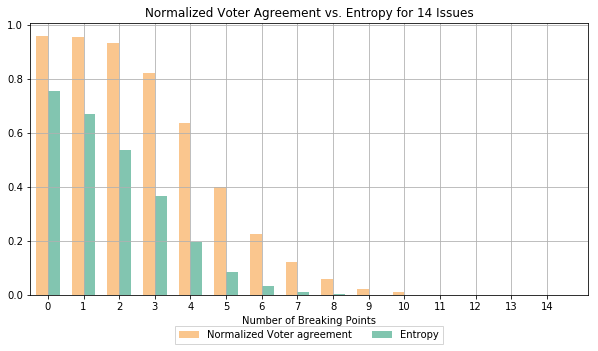

Results in grid:  17000
Values per setting:  1000.0


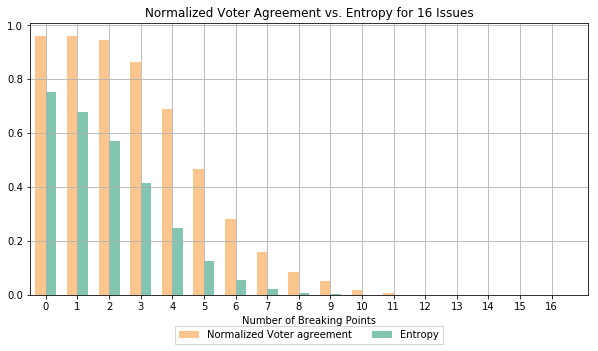

Results in grid:  19000
Values per setting:  1000.0


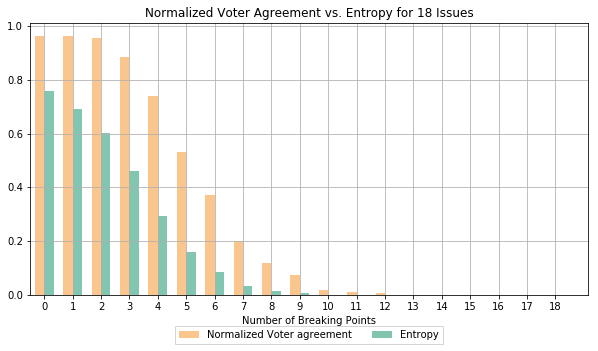

In [30]:
for i in range(2, 20, 2):
    grid = load_grid(i)
    labels = grid[6]
    
    title = "Normalized Voter Agreement vs. Entropy for {} Issues".format(i)
    xlabel = "Number of Breaking Points"
    xticklabels = labels
    ylabel = ""
    legend = ["Normalized Voter agreement", "Entropy"]
    colours = ['#F78F1E', '#078C62', '#0000FF']
    name = "graphs/ratio/entropy_{}.png".format(i)

    data = pd.DataFrame([grid[4], grid[3]]).T
    plot_bar_chart_2(data, title, xlabel, xticklabels, ylabel, legend, colours, name)